1. Load the Heart Disease UCI dataset into a Pandas DataFrame.


In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets

df = pd.concat([X, y], axis=1)
df.to_csv('../data/heart_disease_raw.csv', index=False)
print("Data saved to '../data/heart_disease_raw.csv'")

df.head()

Data saved to '../data/heart_disease_raw.csv'


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


2. Handle missing values (imputation or removal).

In [ ]:
print(df.isnull().sum())

from sklearn.impute import SimpleImputer

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = [col for col in df.columns if col not in categorical_cols + ['num']]

num_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Double check
df.isnull().sum().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


0

3.  Perform data encoding (one-hot encoding for categorical variables).

In [10]:
# Convert target to binary: 0 = no disease, 1 = has disease
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns='num', inplace=True)

one_hot_cols = ['cp', 'restecg', 'slope', 'thal']

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

4. Standardize numerical features using MinMaxScaler or StandardScaler.

In [11]:
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['target'] = y

5. Conduct Exploratory Data Analysis (EDA) with histograms, correlation heatmaps, and boxplots.

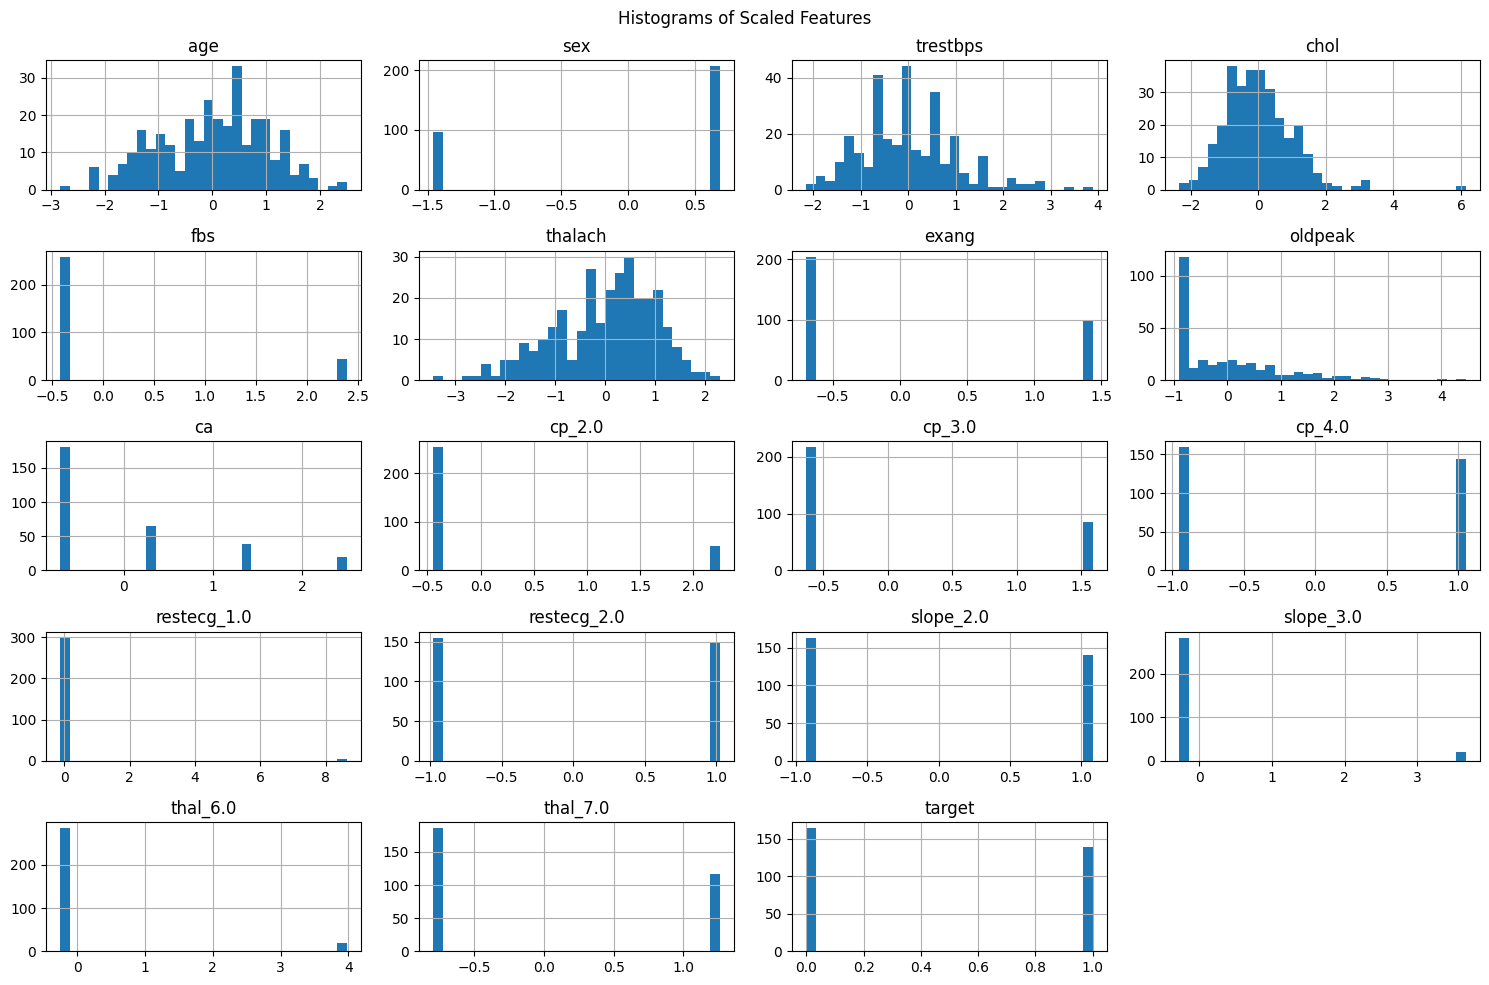

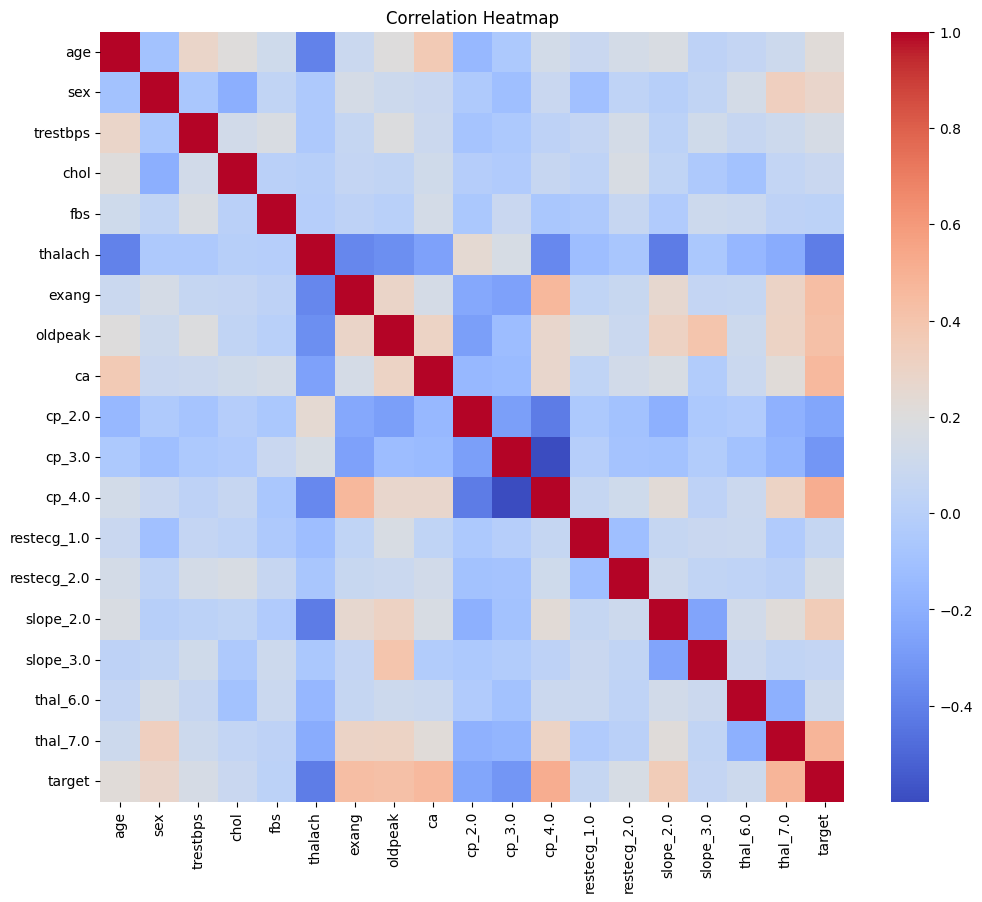

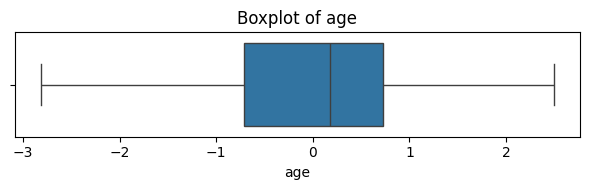

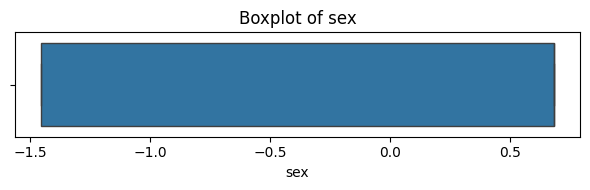

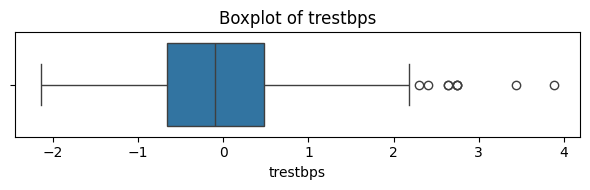

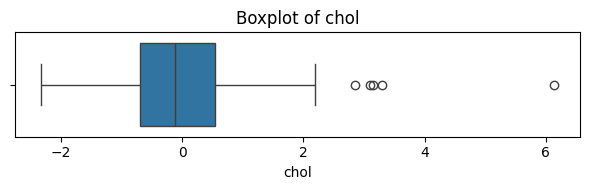

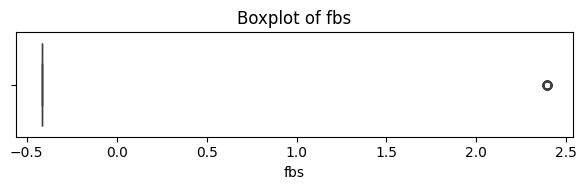

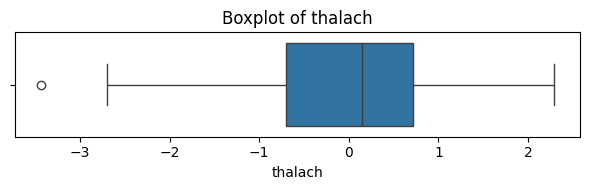

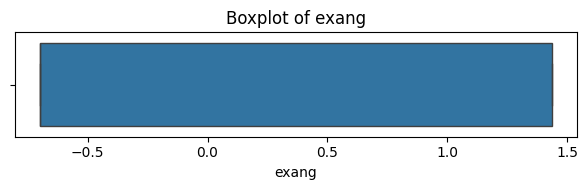

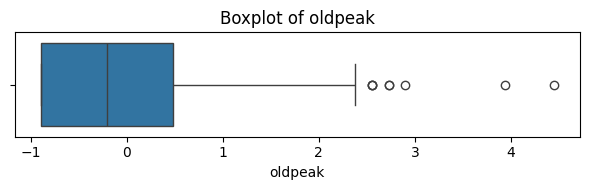

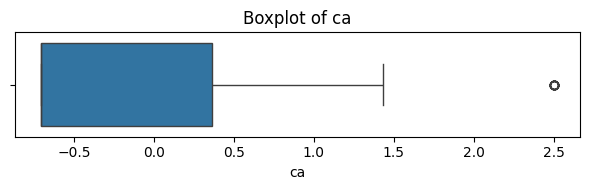

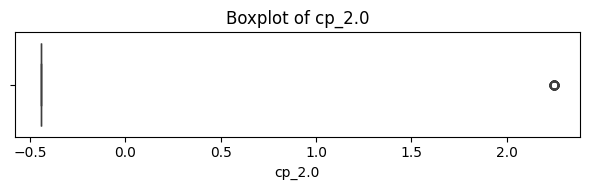

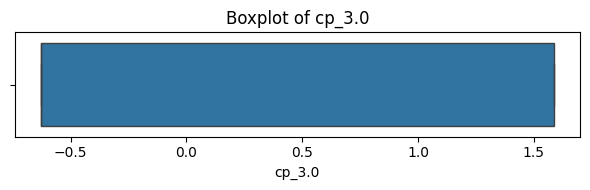

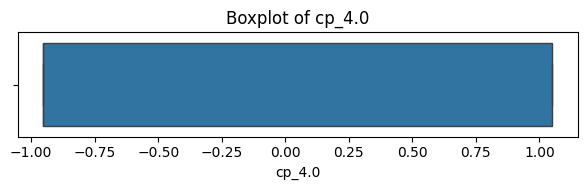

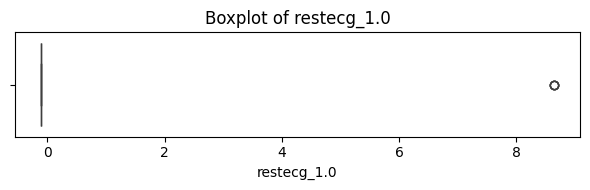

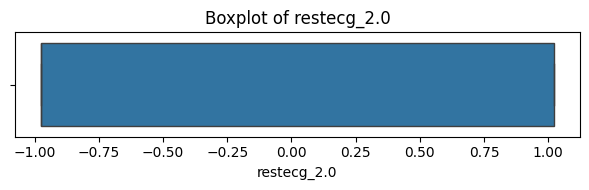

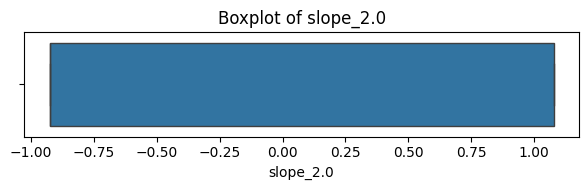

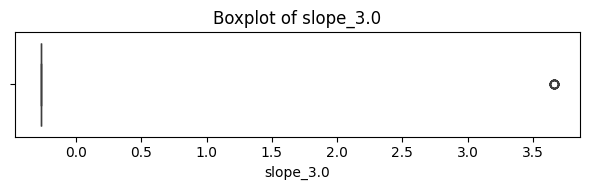

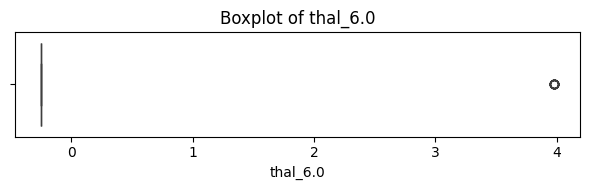

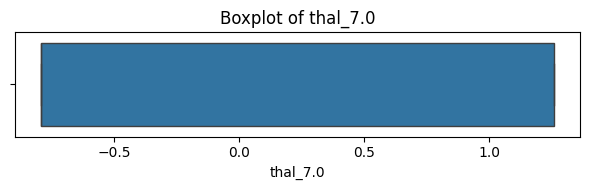

In [ ]:
# Histogram
X_scaled_df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Histograms of Scaled Features")
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(X_scaled_df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Boxplots for outliers
for col in X.columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=X_scaled_df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

X_scaled_df.to_csv('../data/heart_disease_cleaned.csv', index=False)